# 실습 1. 상권별 월평균 매출액 예측 + PCA 차원축소
1. 데이터: 서울시 우리마을 가게 상권배후지추정매출 (2014년 ~ 2020년 2분기)
2. 예측: 상권 종목 별 월평균 매출액 예측 (KRW)
3. 특징: 시계열 데이터 변환
4. 목표:
- 상권세부 코드 One Hot Encoding
- Feature 등 PCA 실행
- 분기별 월평균 매출책 예측 R2 80% 이상

In [1]:
import pandas as pd
import numpy as np
import os
forders = os.listdir('../data/상권배후지추정매출')
df_all_years = pd.DataFrame()
for i in range(0,len(forders)):
    path = '../data/상권배후지추정매출/'+forders[i]
    df= pd.read_csv(path,encoding='cp949',thousands = ',') 
    df_all_years = pd.concat([df_all_years, df])
df_all_years.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,2014,1,A,골목상권,1000522,목동로9길,CS200041,사진관,161604397.0,3021,...,63,1450,1435,97,683,679,674,441,311,5
1,2014,1,A,골목상권,1000580,공항대로8길,CS100007,치킨전문점,352909128.0,14422,...,5746,8280,5597,256,3970,4688,2750,1707,510,19
2,2014,1,A,골목상권,1000507,가로공원로58길,CS200028,미용실,174625276.0,5695,...,289,2639,3044,130,1234,1561,1440,925,391,36
3,2014,1,A,골목상권,1000556,강서로18길,CS300035,인테리어,158530192.0,1571,...,30,395,1158,20,127,662,366,286,92,21
4,2014,1,A,골목상권,1000509,곰달래로2길,CS100007,치킨전문점,238151311.0,9718,...,4157,5763,3573,171,2165,3484,2160,1038,316,11


In [2]:
df_all_years[(df_all_years['점포수'] == 0)] = 1
df_all_years["년도_분기"] = df_all_years['기준_년_코드'].astype(str) +"_" +df_all_years['기준_분기_코드'].astype(str)
df_all_years["점포당_평균_월매출"] = df_all_years['당월_매출_금액'] / df_all_years['점포수']
df_all_years["서비스_업종_코드"] = pd.to_numeric(df_all_years['서비스_업종_코드'].str.replace('CS',''))
df = df_all_years.pivot_table(index = ["상권_코드","서비스_업종_코드"], 
                        columns = "년도_분기", 
                        values = "점포당_평균_월매출")
df.dropna(axis=0, inplace = True)
df.reset_index(inplace=True)
df.isna().sum()

년도_분기
상권_코드        0
서비스_업종_코드    0
2014_1       0
2014_2       0
2014_3       0
2014_4       0
2015_1       0
2015_2       0
2015_3       0
2015_4       0
2016_1       0
2016_2       0
2016_3       0
2016_4       0
2017_1       0
2017_2       0
2017_3       0
2017_4       0
2018_1       0
2018_2       0
2018_3       0
2018_4       0
2019_1       0
2019_2       0
2019_3       0
2019_4       0
2020_1       0
2020_2       0
dtype: int64

In [3]:
df.shape

(42781, 28)

In [4]:
df.head()

년도_분기,상권_코드,서비스_업종_코드,2014_1,2014_2,2014_3,2014_4,2015_1,2015_2,2015_3,2015_4,...,2018_1,2018_2,2018_3,2018_4,2019_1,2019_2,2019_3,2019_4,2020_1,2020_2
0,1000001,100001.0,6.092752e+07,7.119277e+07,6.941415e+07,8.371927e+07,6.258971e+07,6.645696e+07,6.576536e+07,7.757226e+07,...,7.142265e+07,8.301902e+07,7.379520e+07,8.717491e+07,6.061903e+07,6.990543e+07,6.424871e+07,7.248866e+07,4.478399e+07,5.286996e+07
1,1000001,100002.0,7.830883e+07,7.419328e+07,7.638027e+07,9.373318e+07,6.686465e+07,7.288815e+07,7.048284e+07,8.242502e+07,...,6.538066e+07,7.679618e+07,5.656538e+07,8.571366e+07,6.102188e+07,6.731579e+07,6.169022e+07,6.127224e+07,4.493084e+07,5.258605e+07
2,1000001,100003.0,7.725436e+07,2.934658e+07,4.053009e+07,3.842372e+07,2.944173e+07,3.137040e+07,3.018033e+07,3.600755e+07,...,1.566458e+07,1.598102e+07,2.662950e+07,2.784196e+07,2.361333e+07,4.750040e+06,5.968620e+07,5.298060e+07,3.127229e+07,2.911605e+07
3,1000001,100004.0,8.113118e+07,9.185987e+07,9.243012e+07,1.814898e+08,9.864977e+07,1.076278e+08,9.826663e+07,1.204825e+08,...,9.912141e+07,1.228614e+08,1.113682e+08,1.434638e+08,8.218444e+07,7.414365e+07,1.105012e+08,1.324672e+08,1.025918e+08,1.170693e+08
4,1000001,100005.0,3.476190e+07,3.927323e+07,2.214167e+07,2.165559e+07,6.659322e+07,6.389587e+07,4.910766e+07,4.643170e+07,...,4.145602e+07,3.998182e+07,3.790789e+07,4.543281e+07,3.101623e+07,2.955253e+07,2.472802e+07,1.229530e+08,8.340683e+07,1.046677e+08


### 서비스 업종 코드 get dummies

In [5]:
df_dummies = pd.get_dummies(df['서비스_업종_코드'],drop_first=True)
df = pd.concat([df.drop(['서비스_업종_코드'],axis=1),df_dummies], axis = 1 )
df.shape

(42781, 89)

## Scikit-learn으로 PCA 구현

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

model = PCA(n_components=50)

In [42]:
model.fit(df.values)

PCA(n_components=50)

In [43]:
data_t = model.fit_transform(df.values)

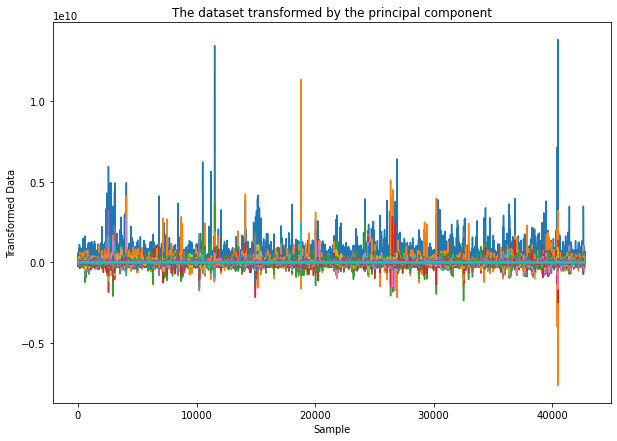

In [44]:
plt.figure(figsize=(10, 7))
plt.plot(data_t)
plt.xlabel('Sample')
plt.ylabel('Transformed Data')
plt.title('The dataset transformed by the principal component')
plt.show()

In [45]:
data_df = pd.DataFrame(data_t)

In [51]:
data_df.shape

(42781, 50)

In [52]:
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,8.481353e+07,-2.487663e+07,8.259123e+06,8.790512e+06,-6.695438e+06,3.960736e+06,-1.286161e+07,-1.077820e+07,8.476638e+06,1.102445e+06,...,-0.005959,0.006810,0.003608,-0.000754,0.003674,0.000809,-0.007513,-0.010075,0.019260,-0.006585
1,8.003683e+07,-3.755934e+07,-1.853561e+07,2.262649e+07,-1.223617e+07,7.940997e+06,-7.397314e+06,-2.392512e+07,-1.567754e+06,-1.015322e+07,...,0.050973,0.032580,0.086731,0.069376,0.003430,-0.045615,0.059016,0.063640,0.066392,-0.019986
2,-1.323545e+08,2.483842e+07,-4.186755e+07,3.144112e+07,2.657181e+06,2.992789e+07,-1.255954e+07,5.448274e+06,-1.501042e+05,4.821200e+06,...,0.089341,-0.021550,-0.087181,-0.015929,-0.045644,-0.034250,-0.072566,-0.020805,0.021953,-0.128324
3,2.923772e+08,-1.093411e+07,-2.491573e+07,-7.536630e+06,-2.558369e+07,9.551688e+06,-1.014109e+07,-3.764116e+07,8.170832e+06,-1.869377e+06,...,-0.005425,0.004444,0.082541,-0.037138,-0.000527,0.097585,-0.017907,0.064124,0.144109,0.128617
4,-2.163894e+07,8.699892e+07,-5.331708e+07,-3.087333e+07,-3.270335e+07,-2.428419e+07,-3.570488e+06,7.301157e+06,5.067790e+06,-4.455383e+06,...,-0.224027,-0.058448,0.095675,-0.067172,-0.027418,0.000489,0.085743,0.101225,-0.038316,0.083248


In [47]:
X = data_df.drop(49,axis=1)
y = data_df[49]
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=1004)
print("Shape of X_train: {}".format(X_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (29946, 49)
Shape of y_train: (29946,)
Shape of X_test: (12835, 49)
Shape of y_test: (12835,)


In [48]:
from sklearn import metrics
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
y_pred = xgb.predict(X_test)

In [50]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
mae = metrics.mean_absolute_error(y_test,y_pred)
r2  = metrics.r2_score(y_test,y_pred)
print("RMSE: %.4f, MAE: %.4f, R-squared:%.4f"%(rmse,mae,r2))

RMSE: 0.0196, MAE: 0.0073, R-squared:0.9798
